In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

[Text(334.8, 298.98, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 244.62, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 244.62, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 190.26000000000002, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 135.9, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 81.53999999999999, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 135.9, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 81.53999999999999, 'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04

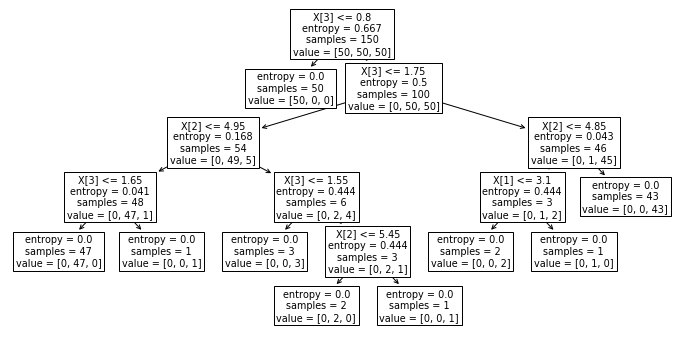

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)  



# Plot the decision surface of a decision tree on the iris dataset


Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.



Automatically created module for IPython interactive environment


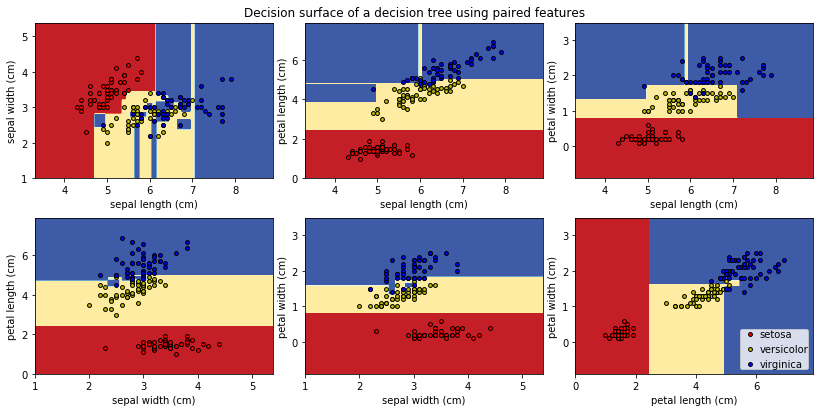

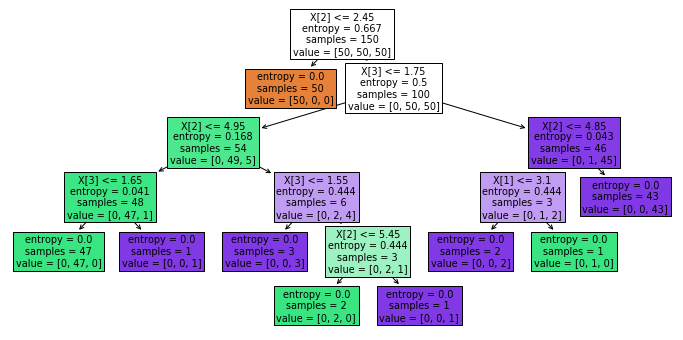

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()